In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [18]:
data = pd.read_csv('NHANES_age_prediction.csv')

In [19]:
print(data.head())

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB
None


In [21]:
print(data.describe())

               SEQN     RIDAGEYR     RIAGENDR       PAQ605       BMXBMI  \
count   2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean   78691.853819    41.795874     1.511414     1.822651    27.955180   
std     2921.365151    20.156111     0.499979     0.398918     7.248962   
min    73564.000000    12.000000     1.000000     1.000000    14.500000   
25%    76171.750000    24.000000     1.000000     2.000000    22.800000   
50%    78749.000000    41.000000     2.000000     2.000000    26.800000   
75%    81213.500000    58.000000     2.000000     2.000000    31.200000   
max    83727.000000    80.000000     2.000000     7.000000    70.100000   

            LBXGLU       DIQ010       LBXGLT        LBXIN  
count  2278.000000  2278.000000  2278.000000  2278.000000  
mean     99.553117     2.016242   114.978929    11.834794  
std      17.889834     0.185556    47.061239     9.718812  
min      63.000000     1.000000    40.000000     0.140000  
25%      91.000000     2

In [22]:
print(data.isnull().sum())

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


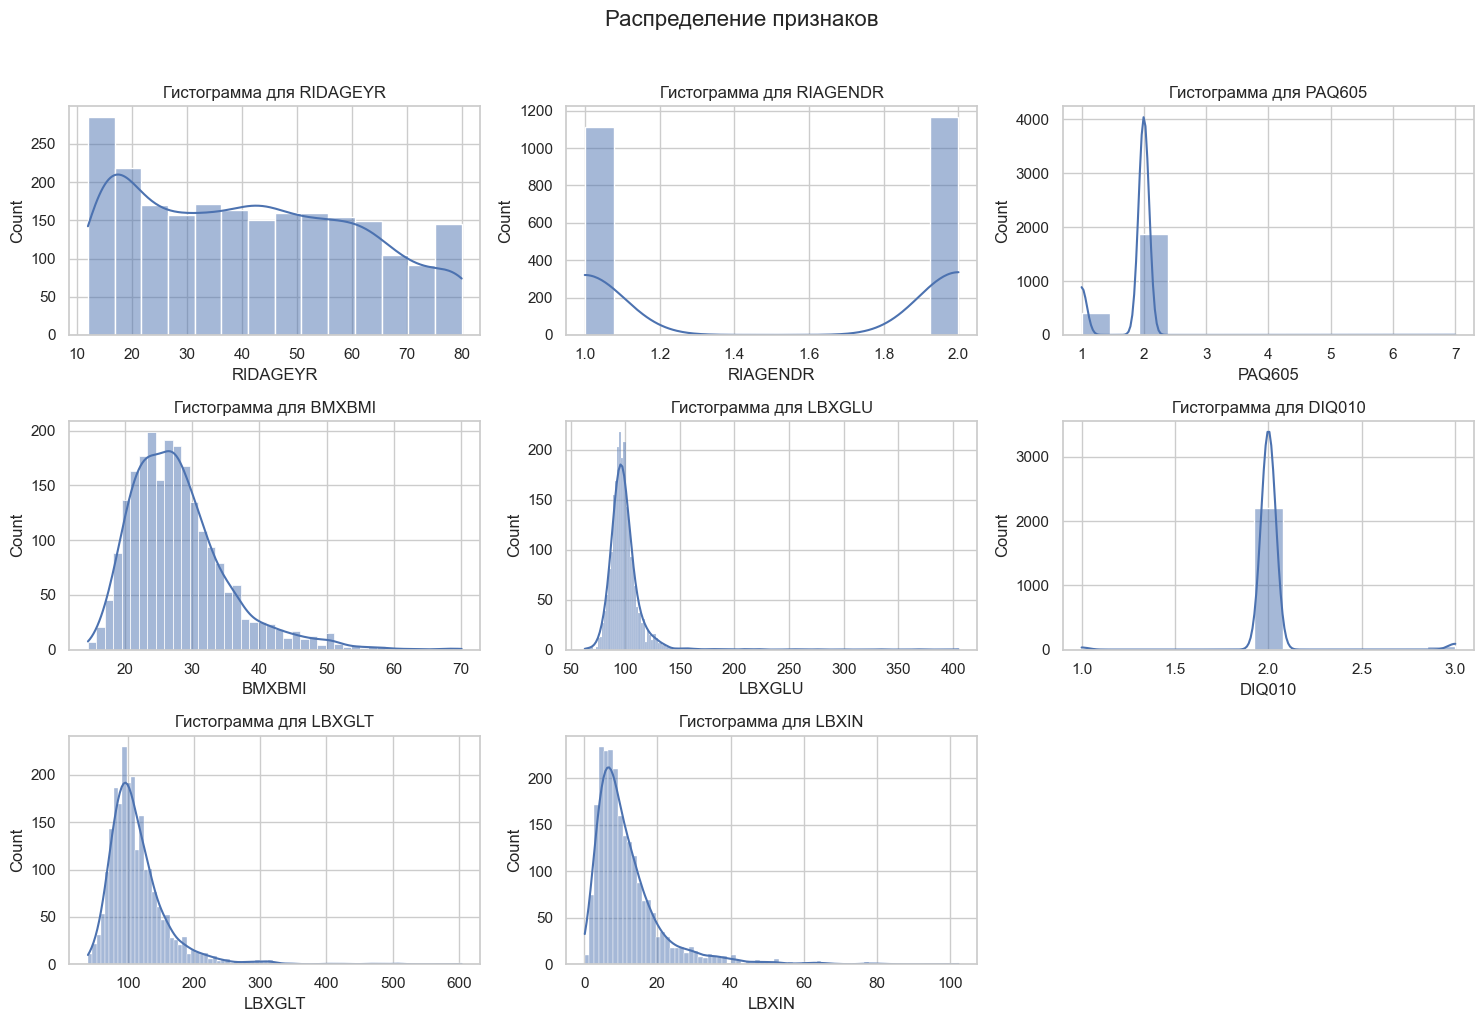

In [23]:
# Установка стиля Seaborn для графиков
sns.set_theme(style="whitegrid")

# Построение гистограмм для всех числовых признаков
num_features = ['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
plt.figure(figsize=(15, 10))  # Установка размера общего поля для графиков
for i, col in enumerate(num_features):
    plt.subplot(3, 3, i+1)  # Создание подграфика для каждого признака
    sns.histplot(data[col], kde=True)
    plt.title(f'Гистограмма для {col}')  # Установка заголовка для каждой гистограммы

plt.suptitle('Распределение признаков', size=16, y=1.02)  # Установка общего заголовка для всех гистограмм
plt.tight_layout()  # Автоматическое устранение перекрытий между графиками
plt.show()  # Отображение графиков

In [24]:
data.dropna(inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

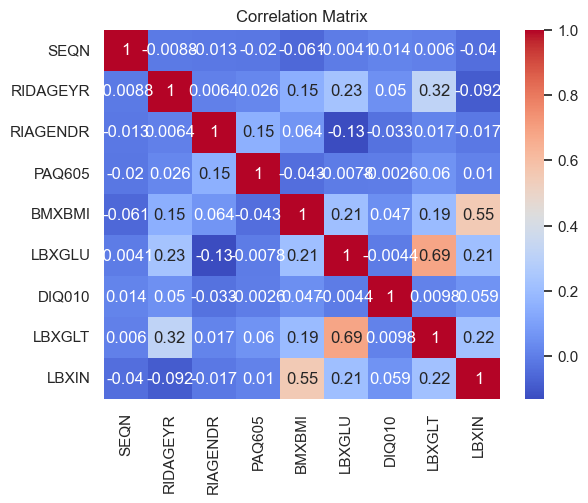

In [25]:
numerical_data = data.select_dtypes(include=[np.number])
corr_matrix = numerical_data.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

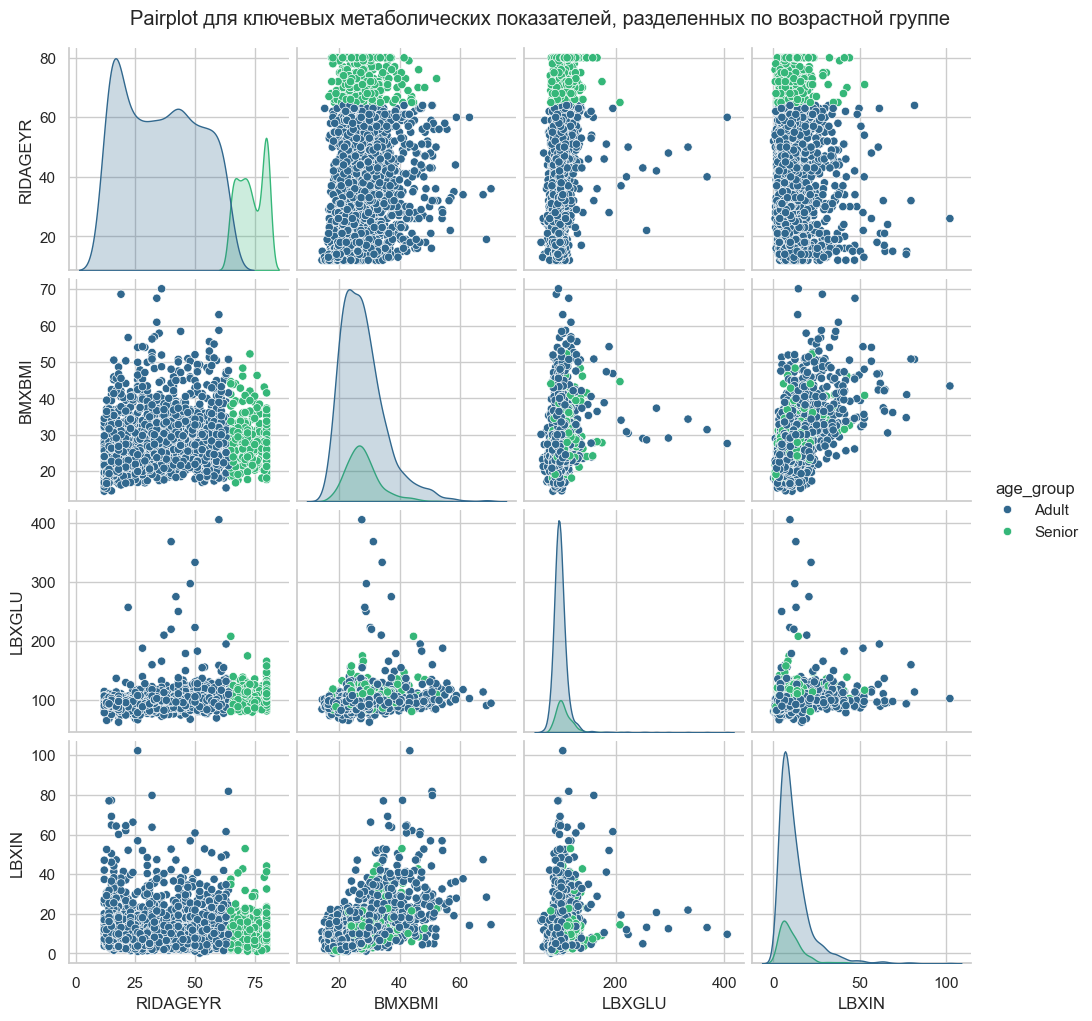

In [26]:
# Выберем интересующие нас столбцы
features_of_interest = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXIN']

# Создание pairplot с разделением по возрастной группе (age_group)
pair_plot = sns.pairplot(data[features_of_interest + ['age_group']], hue='age_group', palette='viridis')

pair_plot.fig.suptitle('Pairplot для ключевых метаболических показателей, разделенных по возрастной группе', y=1.02)
plt.show()

([0, 1], [Text(0, 0, 'Adult'), Text(1, 0, 'Senior')])

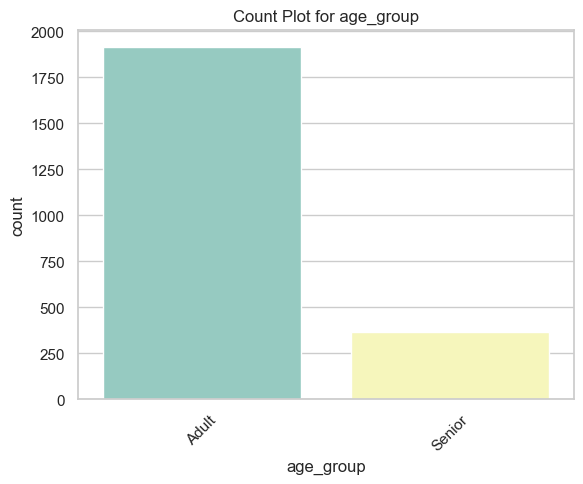

In [27]:
plt.figure()
sns.countplot(x='age_group', data=data, palette='Set3', hue='age_group', legend=False)
plt.title('Count Plot for age_group')
plt.xticks(rotation=45)

In [28]:
# Готовим данные для моделей

data = data.drop('SEQN', axis=1)

age_group_mapping = {
    'Adult': 1,
    'Senior': 2
}

# Применение маппинга к столбцу 'age_group'
data['age_group'] = data['age_group'].replace(age_group_mapping)

print(data.head())

   age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  \
0          1      61.0       2.0     2.0    35.7   110.0     2.0   150.0   
1          1      26.0       2.0     2.0    20.3    89.0     2.0    80.0   
2          1      16.0       1.0     2.0    23.2    89.0     2.0    68.0   
3          1      32.0       1.0     2.0    28.9   104.0     2.0    84.0   
4          1      38.0       2.0     1.0    35.9   103.0     2.0    81.0   

   LBXIN  
0  14.91  
1   3.85  
2   6.14  
3  16.15  
4  10.92  


/var/folders/cc/p2pdx15n07qdv59x8vx59zm00000gn/T/ipykernel_3246/368040849.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age_group'] = data['age_group'].replace(age_group_mapping)


In [29]:

X = data.drop('DIQ010', axis=1)
y = data['DIQ010']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import joblib
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted')

joblib.dump(rf_model, 'rf_model.pkl')

print("RandomForestClassifier:")
print(f'F1 Score: {rf_f1}')
print(f'Accuracy: {rf_accuracy}')
print(f'Recall: {rf_recall}')
print(f'Precision: {rf_precision}')
print()

RandomForestClassifier:
F1 Score: 0.9530892448512587
Accuracy: 0.9671052631578947
Recall: 0.9671052631578947
Precision: 0.9394736842105262



/Users/evgeny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
dummy_model = DummyClassifier(strategy='stratified') 
dummy_model.fit(X_train, y_train)

dummy_predictions = dummy_model.predict(X_test)
joblib.dump(dummy_model, "dummy_model.pkl")

dummy_f1 = f1_score(y_test, dummy_predictions, average='weighted')
dummy_accuracy = accuracy_score(y_test, dummy_predictions)
dummy_recall = recall_score(y_test, dummy_predictions, average='weighted')
dummy_precision = precision_score(y_test, dummy_predictions, average='weighted')

print("DummyClassifier:")
print(f'F1 Score: {dummy_f1}')
print(f'Accuracy: {dummy_accuracy}')
print(f'Recall: {dummy_recall}')
print(f'Precision: {dummy_precision}')
print()

DummyClassifier:
F1 Score: 0.9317627782440155
Accuracy: 0.9254385964912281
Recall: 0.9254385964912281
Precision: 0.9381739900209238



In [32]:
import joblib
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)
joblib.dump(svm_model, "svc_model.pkl")
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_precision = precision_score(y_test, svm_predictions, average='weighted')

print("Support Vector Machine:")
print(f'F1 Score: {svm_f1}')
print(f'Accuracy: {svm_accuracy}')
print(f'Recall: {svm_recall}')
print(f'Precision: {svm_precision}')

Support Vector Machine:
F1 Score: 0.9541866916735046
Accuracy: 0.9692982456140351
Recall: 0.9692982456140351
Precision: 0.9395390889504462


/Users/evgeny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
